In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [340]:
max_treedepth_values = [6, 8, 10, 12]
adapt_delta_values = [0.6, 0.8, 0.9, 0.95]
bench_dict = dict(adapt_delta=[], max_treedepth = [], post = [], prm = [])

for max_treedepth in max_treedepth_values :
    for adapt_delta in adapt_delta_values :
        for i in range(10) :
            
            bench_dict['adapt_delta'].append(adapt_delta)
            bench_dict['max_treedepth'].append(max_treedepth)
            bench_dict['post'].append(np.random.gamma(np.random.lognormal(1, 0.1), 
                                                      np.random.lognormal(5, 0.1), 
                                                      (1000,)))
            bench_dict['prm'].append(i)

In [341]:
bench_df = pd.DataFrame(bench_dict)

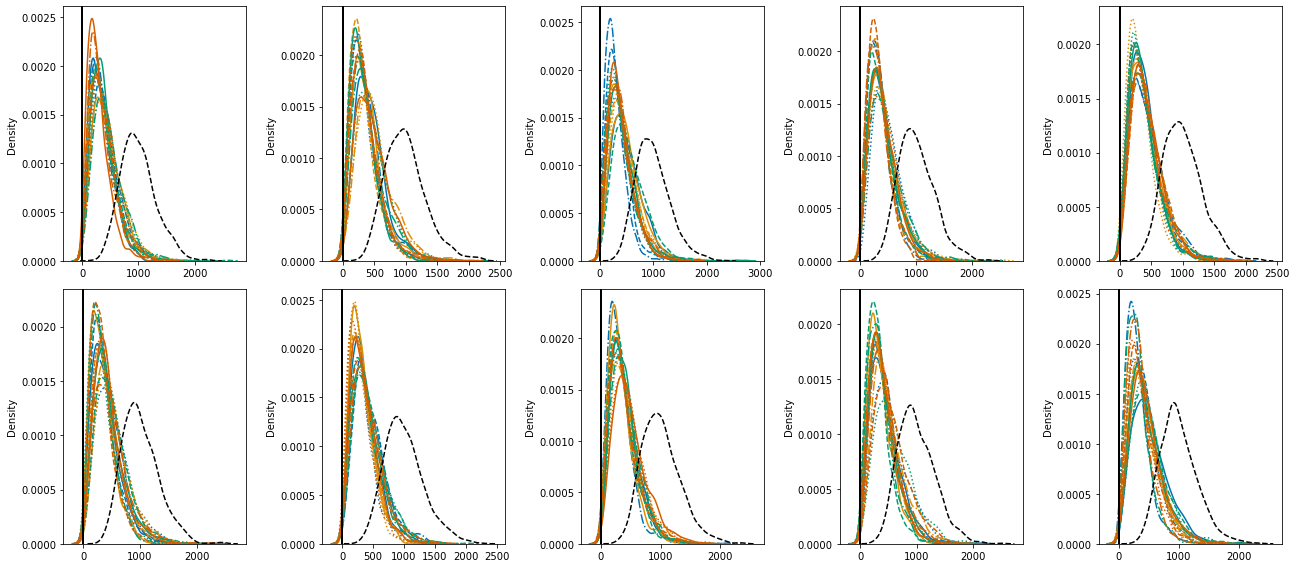

In [348]:
mtd_map = dict([(y,x) for x,y in enumerate(max_treedepth_values)])
mtd_colors = sns.color_palette('colorblind')
delta_map = dict([(y,x) for x,y in enumerate(adapt_delta_values)])
delta_styles = ['-', '--', ':', '-.']

fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(18, 8))



for i in range(10) :
    select = bench_df[bench_df['prm'] == i]
    for l in range(len(select)) :
        sns.kdeplot(data=select['post'].iloc[l], 
                    color=mtd_colors[mtd_map[select['max_treedepth'].iloc[l]]],
                    linestyle=delta_styles[delta_map[select['adapt_delta'].iloc[l]]],
                    ax=ax[i//5, i%5])
    prior = np.random.gamma(10, 100, (1000))
    sns.kdeplot(prior, color='k', linestyle='--', ax=ax[i//5, i%5])
    ax[i//5, i%5].axvline(0, color='k', lw=2)
fig.tight_layout()

In [349]:
custom_lines0 = [Line2D([0], [0], color='k', lw=2),
                 Line2D([0], [0], color='k', lw=2, linestyle='--')]
custom_lines1 = [Line2D([0], [0], color=mtd_colors[k], lw=2) for k in range(len(mtd_map))]
custom_lines2 = [Line2D([0], [0], color="grey", lw=2, linestyle=s) for s in delta_styles]

legend0 = ax[0, 0].legend(custom_lines0, ['truth', 'prior'], loc=1, fontsize=10,
                         frameon=False)
legend1 = ax[0, 0].legend(custom_lines1, max_treedepth_values, title='max_treedepth', loc=7, fontsize=8,
                         frameon=False)
legend2 = ax[0, 0].legend(custom_lines2, adapt_delta_values, title='adapt_delta  ', loc=4, fontsize=8,
                         frameon=False)

#loc= https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

#re add the first 2 legends that were deleted by matplotlib
ax[0, 0].add_artist(legend0) 
ax[0, 0].add_artist(legend1)

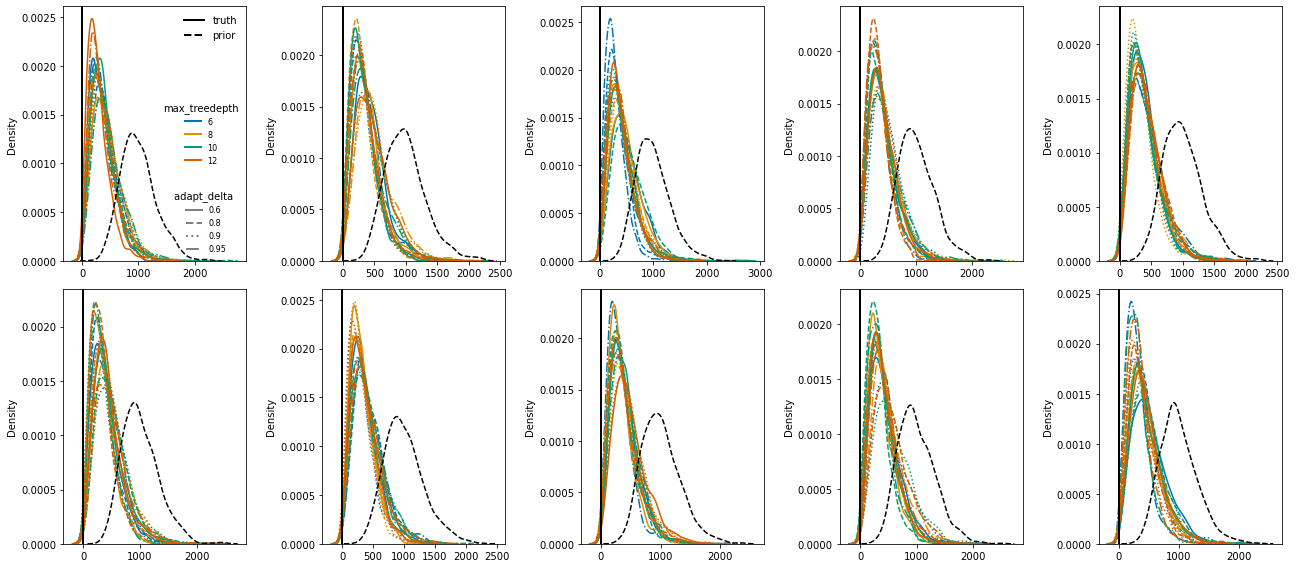

In [350]:
fig